We import the necessary libraries

In [337]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from skopt import BayesSearchCV
from scipy.stats import shapiro, normaltest
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgbm
import catboost as cat
import tensorflow as tf
from tensorflow import keras
import pickle



We read our dataset

In [338]:
df = pd.read_excel('DataCiment.xlsx' , index_col = 0 )
df.reset_index(inplace = True)
#df.to_csv('DataCimentCSV.csv', index=False)
get_columns = df.columns.to_list()
print(get_columns)


['Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'Objectif ']


We check how many null values are present in the target column


In [339]:
Objectif_notnull = df['Objectif '].notnull().sum()
Objectif_null = df['Objectif '].isnull().sum()
Objectif_sum = len(df['Objectif '])
Date_null = df['Date'].isnull().sum()
P1_null = df['P1'].isnull().sum()
P2_null = df['P2'].isnull().sum()
P3_null = df['P3'].isnull().sum()
P4_null = df['P4'].isnull().sum()
P5_null = df['P5'].isnull().sum()
P6_null = df['P6'].isnull().sum()
P7_null = df['P7'].isnull().sum()
P8_null = df['P8'].isnull().sum()
P9_null = 0
P10_null = df['P10'].isnull().sum()
P11_null = df['P11'].isnull().sum()


print(f"Number of Null values in target column: {Objectif_null} out of {Objectif_sum} values")
print(f"Number of non-Null values in target column: {Objectif_notnull} out of {Objectif_sum} values")

print(f"{(Objectif_null / Objectif_sum) * 100:.2f}% of target values are Null\n")
print(f"Number of Null values in Date column: {Date_null}")
print(f"Number of Null values in P1 column: {P1_null}")
print(f"Number of Null values in P2 column: {P2_null}")
print(f"Number of Null values in P3 column: {P3_null}")
print(f"Number of Null values in P4 column: {P4_null}")
print(f"Number of Null values in P5 column: {P5_null}")
print(f"Number of Null values in P6 column: {P6_null}")
print(f"Number of Null values in P7 column: {P7_null}")
print(f"Number of Null values in P8 column: {P8_null}")
print(f"Number of Null values in P9 column: {P9_null}")
print(f"Number of Null values in P10 column: {P10_null}")
print(f"Number of Null values in P11 column: {P11_null}")



Number of Null values in target column: 256 out of 384 values
Number of non-Null values in target column: 128 out of 384 values
66.67% of target values are Null

Number of Null values in Date column: 7
Number of Null values in P1 column: 43
Number of Null values in P2 column: 43
Number of Null values in P3 column: 43
Number of Null values in P4 column: 42
Number of Null values in P5 column: 43
Number of Null values in P6 column: 43
Number of Null values in P7 column: 112
Number of Null values in P8 column: 116
Number of Null values in P9 column: 0
Number of Null values in P10 column: 93
Number of Null values in P11 column: 83


Here we will divide the dataset into two subsets, one with only non null target values and the other with only null target values, we'll train a model in the first subset and then predict the null values with the aforementioned model

In [340]:
data = df.dropna(subset = 'Objectif ')

get_columns = data.columns.to_list()
print(get_columns)

#data.to_csv('DataCimentNNObj.csv' , index = False)
data.head()

['Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'Objectif ']


,Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,Objectif
0,2020-01-01,99.098306,2.340254,1.713615,1.370000,1.075000,63.633100,NaN,NaN,0.715,6.140000,0.069838,47.966667
1,2020-01-02,98.722801,2.279820,1.608611,1.453333,0.986667,63.124600,2.745000,9.180000,0.715,6.442500,0.069994,48.733333
5,2020-01-06,98.989483,2.326445,1.696594,1.500000,1.050000,63.379033,2.680000,NaN,0.715,5.923333,0.070143,48.616667
7,2020-01-08,98.641071,2.373684,1.758065,1.420000,1.460000,60.805750,2.696364,8.758333,0.715,7.200000,0.071918,47.666667
9,2020-01-10,99.093715,2.440433,1.936396,1.330000,1.610000,60.961800,2.717000,9.170000,0.715,6.535000,0.070051,48.900000


In [341]:
data['Objectif ']
count_null = data['Objectif '].isnull().sum()
print(f"Number of null values: {count_null}")

Number of null values: 0


We visualize the distribution pattern between each feature with the target to get familiar with the data

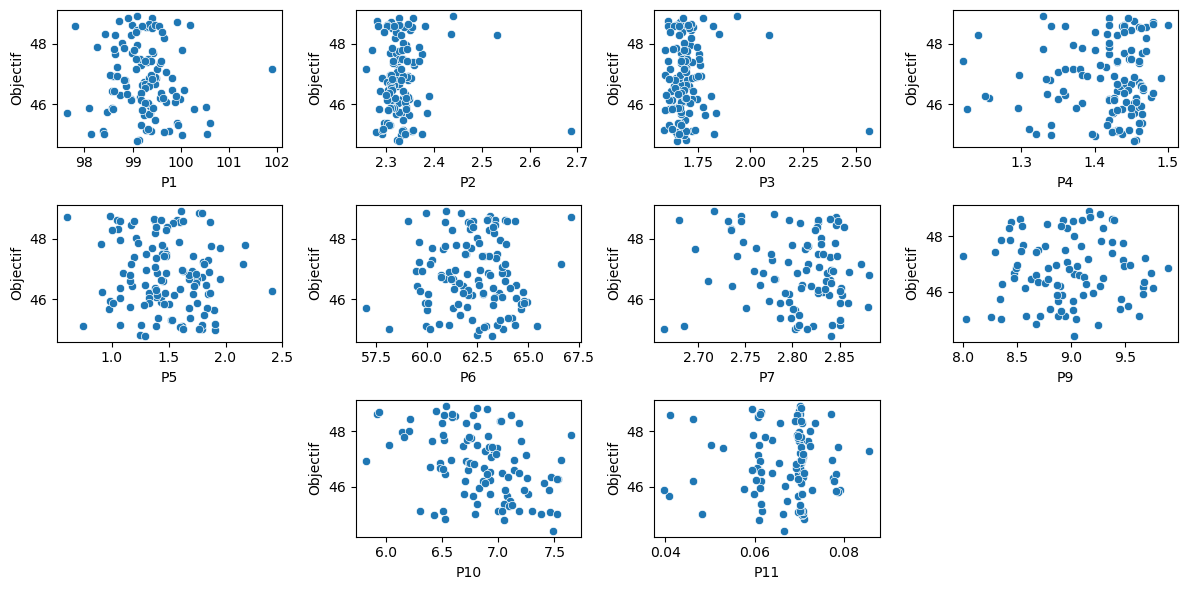

In [342]:
#Data viz
plt.figure(figsize=(12, 6))

# Scatter plot for 'feature1' vs. 'target'
plt.subplot(341)
sns.scatterplot(x='P1', y='Objectif ', data=data)
plt.xlabel('P1')
plt.ylabel('Objectif')

# Scatter plot for 'feature2' vs. 'target'
plt.subplot(342)
sns.scatterplot(x='P2', y='Objectif ', data=data)
plt.xlabel('P2')
plt.ylabel('Objectif')

# Scatter plot for 'feature3' vs. 'target'
plt.subplot(343)
sns.scatterplot(x='P3', y='Objectif ', data=data)
plt.xlabel('P3')
plt.ylabel('Objectif')

plt.subplot(344)
sns.scatterplot(x='P4', y='Objectif ', data=data)
plt.xlabel('P4')
plt.ylabel('Objectif')

plt.subplot(345)
sns.scatterplot(x='P5', y='Objectif ', data=data)
plt.xlabel('P5')
plt.ylabel('Objectif')

plt.subplot(346)
sns.scatterplot(x='P6', y='Objectif ', data=data)
plt.xlabel('P6')
plt.ylabel('Objectif')

plt.subplot(347)
sns.scatterplot(x='P7', y='Objectif ', data=data)
plt.xlabel('P7')
plt.ylabel('Objectif')

plt.subplot(348)
sns.scatterplot(x='P8', y='Objectif ', data=data)
plt.xlabel('P9')
plt.ylabel('Objectif')

plt.subplot(3 ,4, 10)
sns.scatterplot(x='P10', y='Objectif ', data=data)
plt.xlabel('P10')
plt.ylabel('Objectif')

plt.subplot(3 , 4, 11)
sns.scatterplot(x='P11', y='Objectif ', data=data)
plt.xlabel('P11')
plt.ylabel('Objectif')


# Adjust spacing between subplots
plt.tight_layout()

# Display the scatter plots
plt.show()


We drop the date column as it's not useful 

In [343]:
#We keep only the useful features and drop the target for preprocessing
columns = ['Date' , 'Objectif ']
data_toScale = data.copy()
data_toScale.drop(columns = columns , axis = 1  , inplace = True)
data_toScale.to_csv('test.csv' ,index = False)
'''
We normalize
scaler = MinMaxScaler()
data_Scaled = scaler.fit_transform(data_toScale)
data_scaled = pd.DataFrame(data_Scaled)

data_scaled
'''
data['Objectif ']
#data_toScale.to_csv('DataNotScaled.csv' , index = False)


0      47.966667
1      48.733333
5      48.616667
7      47.666667
9      48.900000
         ...    
342    46.816667
344    46.966667
347    47.166667
349    46.853333
351    46.266667
Name: Objectif , Length: 128, dtype: float64

With graphical methods and the shapiro-wilk statistical test, we check if the distribution of each feature column is following the normal distribution

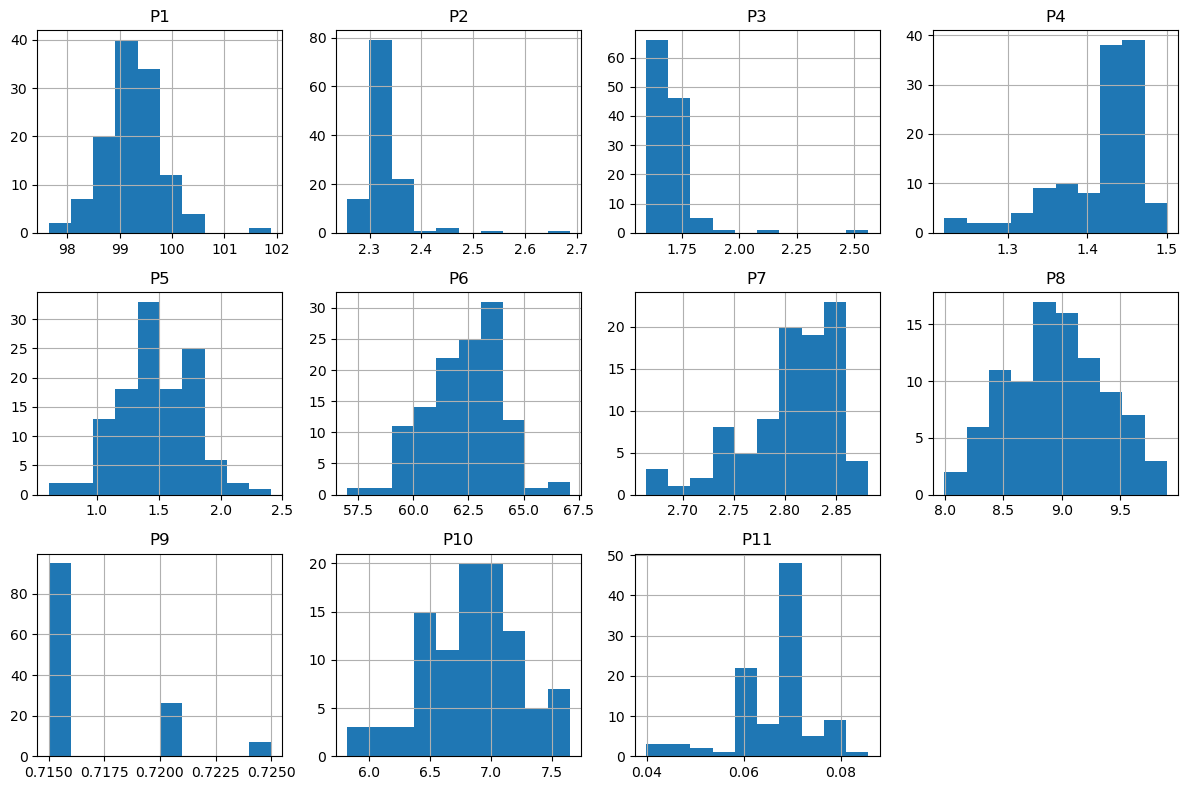

In [344]:


features = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

plt.figure(figsize=(12, 8)) 

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Creating a 3x4 grid of subplots
    data_toScale[feature].hist()
    plt.title(feature)

plt.tight_layout()  
plt.show()


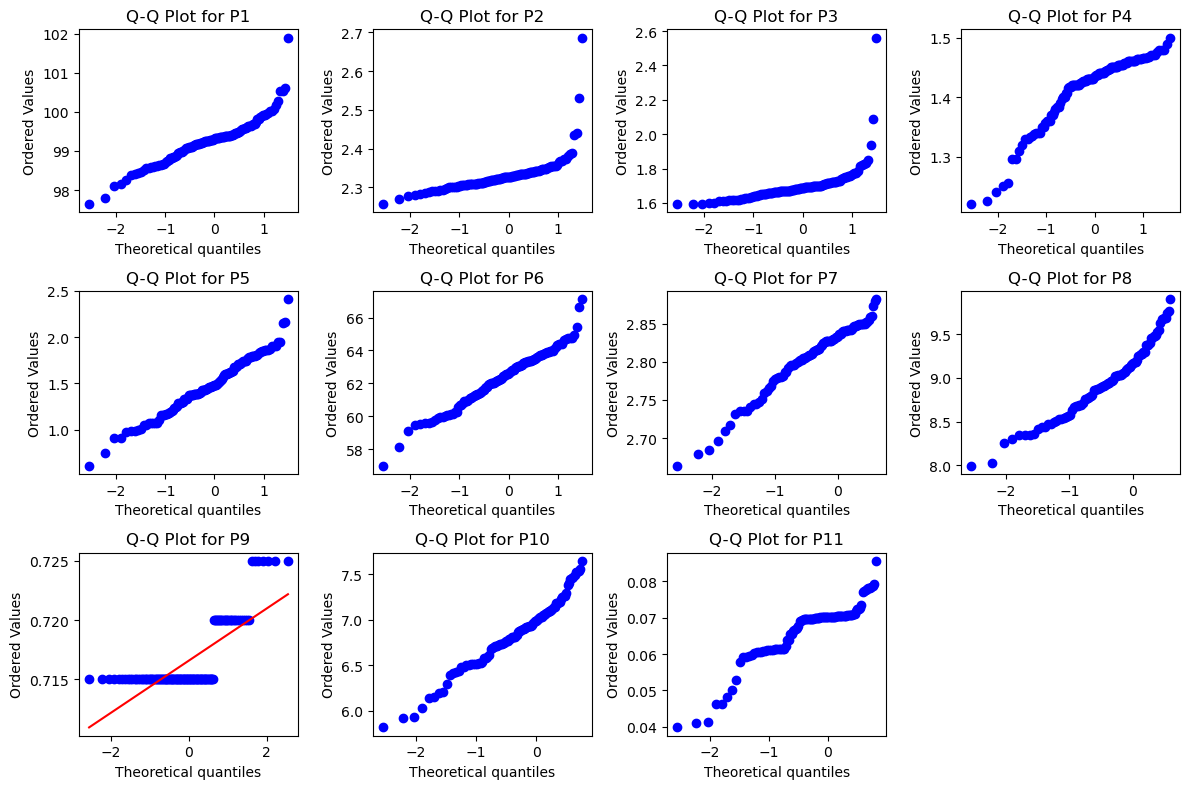

In [345]:
features = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

plt.figure(figsize=(12, 8))  

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  
    stats.probplot(data_toScale[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature}")

plt.tight_layout()  
plt.show()

In [346]:
for feature in features:
    _, shapiro_p_value = shapiro(data_toScale[feature])
    print(f"Shapiro-Wilk test p-value for {feature}: {shapiro_p_value}")

Shapiro-Wilk test p-value for P1: 1.0
Shapiro-Wilk test p-value for P2: 1.0
Shapiro-Wilk test p-value for P3: 1.0
Shapiro-Wilk test p-value for P4: 1.0
Shapiro-Wilk test p-value for P5: 1.0
Shapiro-Wilk test p-value for P6: 1.0
Shapiro-Wilk test p-value for P7: 1.0
Shapiro-Wilk test p-value for P8: 1.0
Shapiro-Wilk test p-value for P9: 1.615270489154147e-17
Shapiro-Wilk test p-value for P10: 1.0
Shapiro-Wilk test p-value for P11: 1.0


Shapiro-Wilk test p-value: 1.0


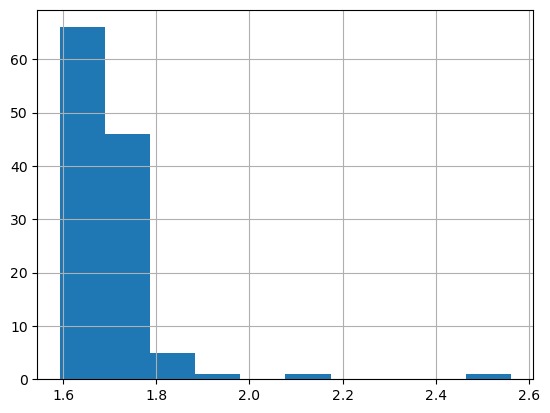

In [347]:
#We handle the missing values

_, shapiro_p_value = shapiro(data_toScale['P3'])
print("Shapiro-Wilk test p-value:", shapiro_p_value)

data_toScale['P3'].hist()
pyplot.show()

#Now that we know that P1 feature is following the normal distribution we can fill the null values with the mean

Shapiro-Wilk test p-value for P9: 1.615270489154147e-17
Number of null values in the P9 column is: 0


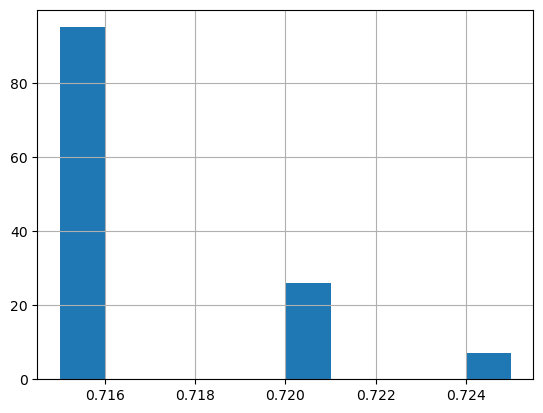

In [348]:
_, shapiro_p_value = shapiro(data_toScale['P9'])
print("Shapiro-Wilk test p-value for P9:", shapiro_p_value)

data_toScale['P9'].hist()
#pyplot.show()

#Here this shows that P9 is not normally distibuted we should fill the null values with the median 

null_count_P9 = data_toScale['P9'].isnull().sum()
print(f"Number of null values in the P9 column is: {null_count_P9}")
#But this shows that there is no null value in P9 so we'll leave it be

Shapiro-Wilk test p-value: 1.0


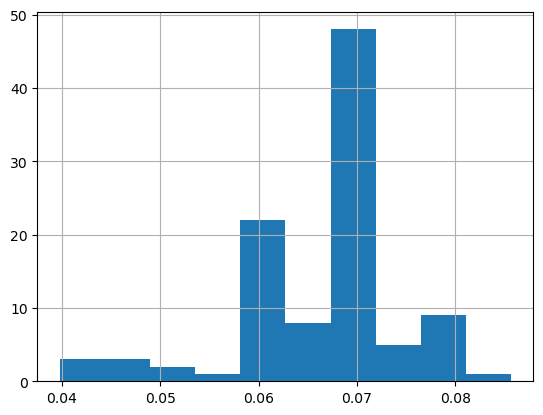

In [349]:
_, shapiro_p_value = shapiro(data_toScale['P11'])
print("Shapiro-Wilk test p-value:", shapiro_p_value)

data_toScale['P11'].hist()
pyplot.show()

We will perform the knn imputation for filling the missing values

In [350]:
imputer = KNNImputer(n_neighbors=5)
data_nnn = data_toScale.copy()

data_en = imputer.fit_transform(data_nnn)
data_nn = pd.DataFrame(data_en , columns=data_toScale.columns)
null_count_data = data_nn.isnull().sum()
print(null_count_data)
data_nn.to_csv('DataCimentNotNullKNN.csv', index=False)



P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
dtype: int64


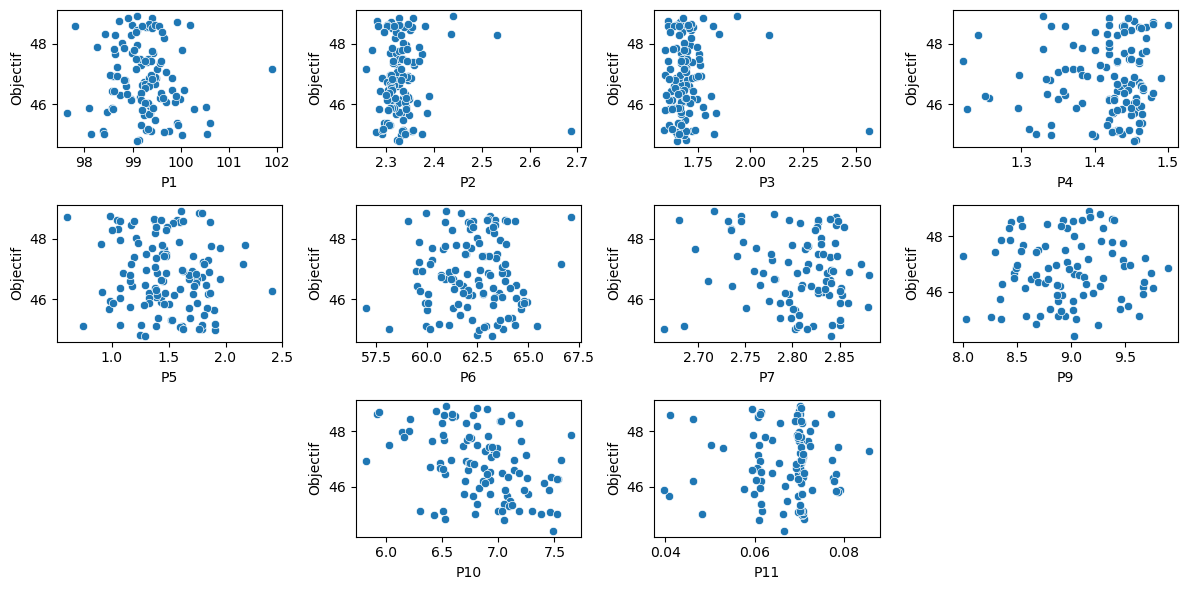

In [351]:
#Data viz
plt.figure(figsize=(12, 6))

# Scatter plot for 'feature1' vs. 'target'
plt.subplot(341)
sns.scatterplot(x='P1', y='Objectif ', data=data)
plt.xlabel('P1')
plt.ylabel('Objectif')

# Scatter plot for 'feature2' vs. 'target'
plt.subplot(342)
sns.scatterplot(x='P2', y='Objectif ', data=data)
plt.xlabel('P2')
plt.ylabel('Objectif')

# Scatter plot for 'feature3' vs. 'target'
plt.subplot(343)
sns.scatterplot(x='P3', y='Objectif ', data=data)
plt.xlabel('P3')
plt.ylabel('Objectif')

plt.subplot(344)
sns.scatterplot(x='P4', y='Objectif ', data=data)
plt.xlabel('P4')
plt.ylabel('Objectif')

plt.subplot(345)
sns.scatterplot(x='P5', y='Objectif ', data=data)
plt.xlabel('P5')
plt.ylabel('Objectif')

plt.subplot(346)
sns.scatterplot(x='P6', y='Objectif ', data=data)
plt.xlabel('P6')
plt.ylabel('Objectif')

plt.subplot(347)
sns.scatterplot(x='P7', y='Objectif ', data=data)
plt.xlabel('P7')
plt.ylabel('Objectif')

plt.subplot(348)
sns.scatterplot(x='P8', y='Objectif ', data=data)
plt.xlabel('P9')
plt.ylabel('Objectif')

plt.subplot(3 ,4, 10)
sns.scatterplot(x='P10', y='Objectif ', data=data)
plt.xlabel('P10')
plt.ylabel('Objectif')

plt.subplot(3 , 4, 11)
sns.scatterplot(x='P11', y='Objectif ', data=data)
plt.xlabel('P11')
plt.ylabel('Objectif')


# Adjust spacing between subplots
plt.tight_layout()

# Display the scatter plots
plt.show()


Now we normalize the data with the MinMaxScaler tool of scklearn so all the features will have the same scale

In [352]:
#Now that we have handled the missing values, we normalize the data

scaler = MinMaxScaler()
array_scaled = scaler.fit_transform(data_nn)
df_scaled = pd.DataFrame(array_scaled)


df_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.342087,0.194364,0.124242,0.535714,0.258333,0.656561,0.566360,0.503622,0.0,0.175342,0.655154
1,0.253849,0.053583,0.015763,0.833333,0.209259,0.606283,0.372129,0.622047,0.0,0.341096,0.658557
2,0.316515,0.162196,0.106658,1.000000,0.244444,0.631440,0.073507,0.566404,0.0,0.056621,0.661814
3,0.234644,0.272241,0.170162,0.714286,0.472222,0.377002,0.148684,0.400700,0.0,0.756164,0.700510
4,0.341008,0.427733,0.354395,0.392857,0.555556,0.392432,0.243492,0.616798,0.0,0.391781,0.659807
...,...,...,...,...,...,...,...,...,...,...,...
123,0.277658,0.171437,0.053523,0.422619,0.305556,0.603952,1.000000,0.517060,0.0,0.529680,0.641350
124,0.407261,0.125239,0.002190,0.273810,0.557407,0.556749,0.690440,0.813648,0.0,0.953973,0.665627
125,0.335629,0.170292,0.097855,0.500000,0.311111,0.680529,0.961715,0.611549,0.0,0.637443,0.676233
126,0.412821,0.127499,0.023709,0.404762,0.625926,0.495129,0.601072,0.512073,0.0,0.558429,0.515504


In [353]:
#We change the number of columns
df_scaled = df_scaled.set_axis(['P1', 'P2', 'P3', 'P4', 'P5' , 'P6' , 'P7' , 'P8' , 'P9' , 'P10' , 'P11'], axis=1) 

df_scaled.to_csv('DataScaledNormKNN.csv' , index = False)


In [354]:
#Now that we have finished the preprocessing we add the target column back
df1 = pd.read_csv('dataframeKNN.csv' , index_col = 0)
df1.reset_index(inplace = True)
df1


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,Objectif
0,0.342087,0.194364,0.124242,0.535714,0.258333,0.656561,0.456355,0.452756,0.0,0.175342,0.655154,47.966667
1,0.253849,0.053583,0.015763,0.833333,0.209259,0.606283,0.372129,0.622047,0.0,0.341096,0.658557,48.733333
2,0.316515,0.162196,0.106658,1.000000,0.244444,0.631440,0.073507,0.452756,0.0,0.056621,0.661814,48.616667
3,0.234644,0.272241,0.170162,0.714286,0.472222,0.377002,0.148684,0.400700,0.0,0.756164,0.700510,47.666667
4,0.341008,0.427733,0.354395,0.392857,0.555556,0.392432,0.243492,0.616798,0.0,0.391781,0.659807,48.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.277658,0.171437,0.053523,0.422619,0.305556,0.603952,1.000000,0.517060,0.0,0.529680,0.641350,46.816667
124,0.407261,0.125239,0.002190,0.273810,0.557407,0.556749,0.690440,0.813648,0.0,0.953973,0.665627,46.966667
125,0.335629,0.170292,0.097855,0.500000,0.311111,0.680529,0.961715,0.611549,0.0,0.637443,0.676233,47.166667
126,0.412821,0.127499,0.023709,0.404762,0.625926,0.495129,0.609495,0.606299,0.0,0.753425,0.504097,46.853333


Some debugging 

In [355]:
#row_prob = df1.iloc[116]
df1['P4'] = df1['P4'].replace(125, 0.125)


#print(row_prob)

row_prob = df1.iloc[116]
print(row_prob)


P1            0.467292
P2            0.194392
P3            0.106314
P4            0.125000
P5            0.694444
P6            0.475315
P7            0.609495
P8            0.560367
P9            0.000000
P10           0.619635
P11           0.829160
Objectif     46.216667
Name: 116, dtype: float64


In [356]:
df1['P5'] = df1['P5'].replace(325 , 0.2894736842)
row_problem = df1.iloc[29]
print(row_problem)

P1            0.386824
P2            0.227990
P3            0.136414
P4            0.750000
P5            0.289474
P6            0.633182
P7            0.808576
P8            0.727034
P9            0.000000
P10           0.639452
P11           0.286088
Objectif     47.400000
Name: 29, dtype: float64


After performing the normalization we replot the scatter graphs to see if the scaling was performed correctly ie: all the feature values should range from 0 to 1

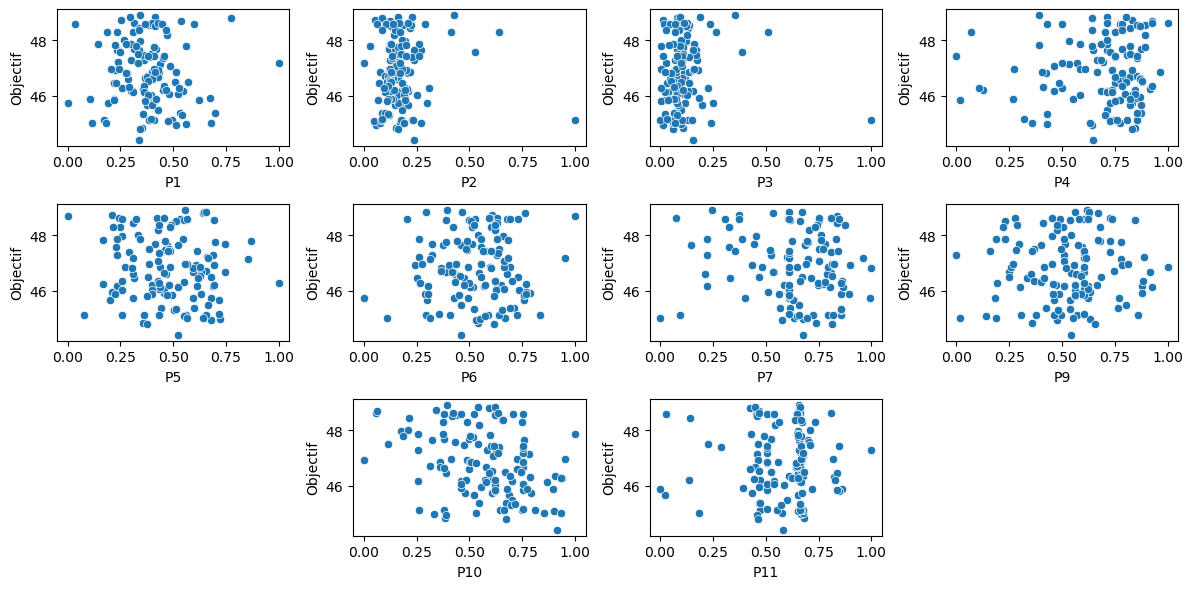

In [357]:
#We now do the visualization of the new cleaned and normalized dataset

#Data viz
plt.figure(figsize=(12, 6))

# Scatter plot for 'feature1' vs. 'target'
plt.subplot(341)
sns.scatterplot(x='P1', y='Objectif ', data=df1)
plt.xlabel('P1')
plt.ylabel('Objectif')

# Scatter plot for 'feature2' vs. 'target'
plt.subplot(342)
sns.scatterplot(x='P2', y='Objectif ', data=df1)
plt.xlabel('P2')
plt.ylabel('Objectif')

# Scatter plot for 'feature3' vs. 'target'
plt.subplot(343)
sns.scatterplot(x='P3', y='Objectif ', data=df1)
plt.xlabel('P3')
plt.ylabel('Objectif')

plt.subplot(344)
sns.scatterplot(x='P4', y='Objectif ', data=df1)
plt.xlabel('P4')
plt.ylabel('Objectif')

plt.subplot(345)
sns.scatterplot(x='P5', y='Objectif ', data=df1)
plt.xlabel('P5')
plt.ylabel('Objectif')

plt.subplot(346)
sns.scatterplot(x='P6', y='Objectif ', data=df1)
plt.xlabel('P6')
plt.ylabel('Objectif')

plt.subplot(347)
sns.scatterplot(x='P7', y='Objectif ', data=df1)
plt.xlabel('P7')
plt.ylabel('Objectif')

plt.subplot(348)
sns.scatterplot(x='P8', y='Objectif ', data=df1)
plt.xlabel('P9')
plt.ylabel('Objectif')

plt.subplot(3 ,4, 10)
sns.scatterplot(x='P10', y='Objectif ', data=df1)
plt.xlabel('P10')
plt.ylabel('Objectif')

plt.subplot(3 , 4, 11)
sns.scatterplot(x='P11', y='Objectif ', data=df1)
plt.xlabel('P11')
plt.ylabel('Objectif')


# Adjust spacing between subplots
plt.tight_layout()

# Display the scatter plots
plt.show()


Now that everything is ready we can modelize

In [358]:
#Now that everything is ready we'll use our dataset to train a Linear Regression model

X = df1.drop(columns = ['Objectif '])  
y = df1['Objectif ']

#We divide the df into a train set: 80% of data and a test set: 20% of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#We create and train the model
model = lgbm.LGBMRegressor()
model.fit(X_train, y_train)

#We predict in our test set
y_pred = model.predict(X_test)

#We evaluate our model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1.6276833483057906
R-squared: 0.011992831400040482


In [359]:
predictions_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
print(predictions_df)



     True Values  Predicted Values
55     48.633333         47.118740
40     48.800000         46.334985
19     46.683333         45.894558
31     45.483333         46.828063
98     45.316667         47.147909
56     47.750000         47.550380
69     47.800000         46.972739
104    45.150000         46.422796
81     44.816667         46.372277
26     47.683333         46.643126
94     45.033333         46.166397
27     45.733333         46.904442
64     45.150000         47.505928
4      48.900000         47.566551
96     45.150000         46.128952
113    45.883333         46.789977
36     47.166667         46.145217
80     46.600000         46.691445
125    47.166667         47.107192
84     46.366667         46.160220
18     47.700000         46.236071
10     47.583333         47.526632
118    47.433333         46.381698
11     44.433333         46.669222
105    46.133333         47.231366
45     46.816667         46.801409


In [360]:
#Now we will use our model to predict the missing target features

df2 = df[df['Objectif '].isnull()]
df2.to_csv("DataframeObjNAN_KNN.csv" , index = False)

count_nan = df2.isna().sum()
print(count_nan)

columns = ['Objectif ' , 'Date']
data2 = df2.copy()
data2.drop(columns = columns , axis = 1  , inplace = True)
#data2.to_csv("test2.csv" , index = False)



Date           7
P1            35
P2            35
P3            35
P4            35
P5            35
P6            35
P7            78
P8            81
P9             4
P10           65
P11           57
Objectif     256
dtype: int64


Shapiro-Wilk test p-value: 1.0


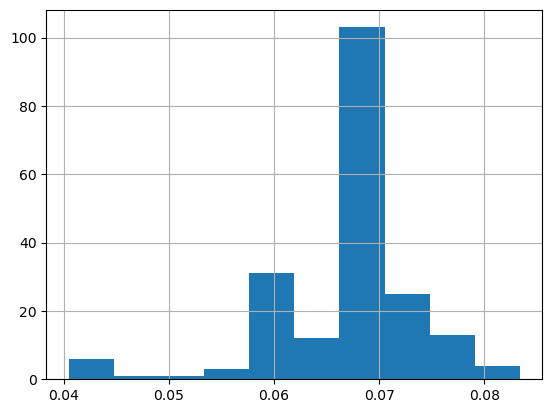

In [361]:
_, shapiro_p_value = shapiro(data2['P11'])
print("Shapiro-Wilk test p-value:", shapiro_p_value)

data2['P11'].hist()
pyplot.show()


In [362]:
#All the features are following a normal distribution we'll replace the missing values
'''
column_mean = data2.mean()
#print(column_means)

data2_nn = data2.copy()
data2_nn.fillna(column_mean , inplace = True)
null_count_data = data2_nn.isnull().sum()
#data2_nn.to_csv('Dataframe2CimentNotNull.csv', index=False)
print(null_count_data)
'''


imputer2 = KNNImputer(n_neighbors=5)
df2_nnn = data2.copy()

data_en2 = imputer2.fit_transform(df2_nnn)
data2_nn = pd.DataFrame(data_en2 , columns=data2.columns)
null_count_data = data2_nn.isnull().sum()

print(null_count_data)
#data_nn.to_csv('Dataframe2CimentNotNull_KNN.csv', index=False)






P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
dtype: int64


In [363]:
#Now we normalize the data

scaler2 = MinMaxScaler()
array2_scaled = scaler.fit_transform(data2_nn)
data2_scaled = pd.DataFrame(array2_scaled)



data2_scaled = data2_scaled.set_axis(['P1', 'P2', 'P3', 'P4', 'P5' , 'P6' , 'P7' , 'P8' , 'P9' , 'P10' , 'P11'], axis=1) 

#data2_scaled.to_csv("DataframeScaled2.csv" , index = False)




In [364]:
#We use the previous model to predict the missing values
dataframe2 = data2_scaled.copy()

predictions2 = model.predict(data2_scaled)

dataframe2['Objectif '] = predictions2

dataframe2

dataframe2.to_csv("Dataframe2predicted_KNN.csv" , index = False)


In [365]:
#We add the predictions to our dataset
df22 = df2.copy()
df22['Objectif '] = predictions2

df22.to_csv("df2predictedKNN.csv" , index = False)

After predicting the missing features we combine everything as to have a final dataset having 0 null target values

In [366]:
#And then we combine them with the original dataset to obtain a final dataset with all the target values available
dataframe = df22.combine_first(df)
dataframe.to_csv("DatframeCimentFINAL_KNN.csv" , index = False)

And now we can modelize on the final dataset after some data cleaning

In [367]:
df3 = pd.read_csv("DatframeCimentDateNN_KNN.csv"  )
df3.isnull().sum()
df3_toScale = df3.copy()
obj3null = df3_toScale['Objectif '].isnull().sum()
print("Number of null values in target column: ",obj3null)

Number of null values in target column:  0


In [368]:
columns_to_drop = ['Date' , 'Objectif ']
df3_toScale.drop(columns = columns_to_drop , axis = 1 , inplace = True)
df3_toScale

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,99.098306,2.340254,1.713615,1.370000,1.075000,63.633100,NaN,NaN,715.0,6.140000,0.069838
1,98.722801,2.279820,1.608611,1.453333,0.986667,63.124600,2.745000,9.180,715.0,6.442500,0.069994
2,99.102621,2.339768,1.723449,1.443333,1.293333,62.416600,2.730000,9.405,715.0,6.459091,0.069090
3,98.727026,2.336018,1.690402,1.470000,0.955000,63.241550,2.702222,8.878,715.0,6.370000,0.070069
4,99.303335,2.350911,1.752401,1.476667,1.373333,62.584333,2.710000,9.120,715.0,6.145000,0.069843
...,...,...,...,...,...,...,...,...,...,...,...
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,NaN,0.070154
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070412
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070177
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070094


In [369]:
#We handle the missing values with the KNN imputer

imputer1 = KNNImputer(n_neighbors=5)
df3_nnn = df3_toScale.copy()

data_en3 = imputer1.fit_transform(df3_nnn)
df3_nn = pd.DataFrame(data_en3 , columns=df3_toScale.columns)
null_count_data = data_nn.isnull().sum()
print(null_count_data)
data_nn.to_csv('Dataframe3CimentNotNull_KNN.csv', index=False)


'''
column_to_mean = df3_toScale.mean()
#print(column_to_mean)

df3_nn = df3_toScale.copy()
df3_nn.fillna(column_to_mean , inplace = True)
null_count3_data = df3_nn.isnull().sum()
#df3_nn.to_csv('Dataframe3CimentNotNull.csv', index=False)
print(null_count_data)
'''


P1     0
P2     0
P3     0
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
dtype: int64


"\ncolumn_to_mean = df3_toScale.mean()\n#print(column_to_mean)\n\ndf3_nn = df3_toScale.copy()\ndf3_nn.fillna(column_to_mean , inplace = True)\nnull_count3_data = df3_nn.isnull().sum()\n#df3_nn.to_csv('Dataframe3CimentNotNull.csv', index=False)\nprint(null_count_data)\n"

In [370]:
#We normalize the data

scaler3 = MinMaxScaler()
array3_scaled = scaler.fit_transform(df3_nn)
df3_scaled = pd.DataFrame(array3_scaled)




df3_scaled = df3_scaled.set_axis(['P1', 'P2', 'P3', 'P4', 'P5' , 'P6' , 'P7' , 'P8' , 'P9' , 'P10' , 'P11'], axis=1) 
#df3_scaled
df3_scaled.to_csv('Dataframe3scaledKNN.csv' , index = False)

threshold_value = 1
below_threshold_mask = df3_scaled > threshold_value
print(below_threshold_mask.sum())



P1     0
P2     0
P3     1
P4     0
P5     0
P6     0
P7     0
P8     0
P9     0
P10    0
P11    0
dtype: int64


In [371]:
#Now that we finished the preprocessing we'll create a ML model to train on this dataset
df3_scaled.insert(0, 'Date', df3['Date'])
#df3_scaled

df3_scaled['Objectif '] = df3['Objectif ']
df3_scaled


,Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,Objectif
0,2020-01-01,0.503001,0.207967,0.183862,0.468750,0.203057,0.708481,0.954008,0.863780,0.959693,0.781170,0.655154,47.966667
1,2020-01-02,0.436344,0.069563,0.082768,0.729167,0.164483,0.665803,0.944110,0.884271,0.959693,0.819656,0.658557,48.733333
2,2020-01-03,0.503767,0.206855,0.193330,0.697917,0.298399,0.606381,0.938951,0.905945,0.959693,0.821767,0.638850,46.674746
3,2020-01-04,0.437094,0.198267,0.161514,0.781250,0.150655,0.675619,0.929397,0.855181,0.959693,0.810433,0.660185,46.723741
4,2020-01-05,0.539396,0.232374,0.221204,0.802083,0.333333,0.620459,0.932072,0.878492,0.959693,0.781807,0.655273,46.723741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,2021-01-14,0.491800,0.174728,0.176221,0.610417,0.486754,0.456317,0.959358,0.831594,0.973128,0.864527,0.662037,46.179262
380,2021-01-15,0.550919,0.196331,0.176399,0.620833,0.328675,0.655469,0.957223,0.853755,0.383877,0.868567,0.667668,46.179262
381,2021-01-16,0.496115,0.175506,0.151074,0.598958,0.393304,0.558181,0.965990,0.874671,0.578503,0.886316,0.662550,46.179262
382,2021-01-17,0.488927,0.269239,0.226933,0.600000,0.287627,0.620960,0.951428,0.861397,0.770441,0.875285,0.660742,46.179262


In [372]:
#Before training the model we have to convert the date types into integers
types = df3_scaled['Date'].dtype
print("Date of df3 is of type: " , types)

#df33 = pd.read_csv("DatframeCimentDateNN3.csv")

#types3 = df33['Date'].dtype
#print("Date of df33 is of type: " , types3)

Date of df3 is of type:  object


In [373]:
#We convert the date column to date type to ease the conversion into numerical values afterwards
df3_scaled['Date'] = pd.to_datetime(df3_scaled['Date'])
ty3 = df3_scaled['Date'].dtype
print(ty3)
df3_scaled.to_csv("dataframebla.csv" , index = False)

datetime64[ns]


In [380]:
#Now to process the date column we'll use cyclical encoding technique

# Extract day, month, and year components
df3_scaled['day'] = df3_scaled['Date'].dt.day
df3_scaled['month'] = df3_scaled['Date'].dt.month
df3_scaled['year'] = df3_scaled['Date'].dt.year

# Define the maximum values for day, month, and year
max_day = 31  # Maximum day of the month
max_month = 12  # Maximum month of the year
max_year = 2021  # Maximum year in the dataset

# Cyclical encoding for day, month, and year
df3_scaled['day_sin'] = np.sin(2 * np.pi * df3_scaled['day'] / max_day)
df3_scaled['day_cos'] = np.cos(2 * np.pi * df3_scaled['day'] / max_day)
df3_scaled['month_sin'] = np.sin(2 * np.pi * df3_scaled['month'] / max_month)
df3_scaled['month_cos'] = np.cos(2 * np.pi * df3_scaled['month'] / max_month)
df3_scaled['year_sin'] = np.sin(2 * np.pi * df3_scaled['year'] / max_year)
df3_scaled['year_cos'] = np.cos(2 * np.pi * df3_scaled['year'] / max_year)

# Display the encoded data
#print(df3_scaled[['Date', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos']])
#df3_scaled.to_csv("cos&sin.csv", index = False)
df3_toModel = df3_scaled.copy()
todrop = ['day', 'month', 'year', 'Date']
df3_toModel.drop(columns = todrop, axis = 1, inplace=True)
df3_toModel.columns
df3_toModel



,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,Objectif,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos
0,0.503001,0.207967,0.183862,0.468750,0.203057,0.708481,0.954008,0.863780,0.959693,0.781170,0.655154,47.966667,0.201299,0.979530,0.5,0.866025,-3.108944e-03,0.999995
1,0.436344,0.069563,0.082768,0.729167,0.164483,0.665803,0.944110,0.884271,0.959693,0.819656,0.658557,48.733333,0.394356,0.918958,0.5,0.866025,-3.108944e-03,0.999995
2,0.503767,0.206855,0.193330,0.697917,0.298399,0.606381,0.938951,0.905945,0.959693,0.821767,0.638850,46.674746,0.571268,0.820763,0.5,0.866025,-3.108944e-03,0.999995
3,0.437094,0.198267,0.161514,0.781250,0.150655,0.675619,0.929397,0.855181,0.959693,0.810433,0.660185,46.723741,0.724793,0.688967,0.5,0.866025,-3.108944e-03,0.999995
4,0.539396,0.232374,0.221204,0.802083,0.333333,0.620459,0.932072,0.878492,0.959693,0.781807,0.655273,46.723741,0.848644,0.528964,0.5,0.866025,-3.108944e-03,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.491800,0.174728,0.176221,0.610417,0.486754,0.456317,0.959358,0.831594,0.973128,0.864527,0.662037,46.179262,0.299363,-0.954139,0.5,0.866025,-2.449294e-16,1.000000
380,0.550919,0.196331,0.176399,0.620833,0.328675,0.655469,0.957223,0.853755,0.383877,0.868567,0.667668,46.179262,0.101168,-0.994869,0.5,0.866025,-2.449294e-16,1.000000
381,0.496115,0.175506,0.151074,0.598958,0.393304,0.558181,0.965990,0.874671,0.578503,0.886316,0.662550,46.179262,-0.101168,-0.994869,0.5,0.866025,-2.449294e-16,1.000000
382,0.488927,0.269239,0.226933,0.600000,0.287627,0.620960,0.951428,0.861397,0.770441,0.875285,0.660742,46.179262,-0.299363,-0.954139,0.5,0.866025,-2.449294e-16,1.000000


In [ ]:
#Now to process the date column we'll use the one hot encoding technique and separate the date column into three columns each of them representing the day, the month and the year respectively

#df3_scaled['Year'] = df3_scaled['Date'].dt.year
#df3_scaled['DayOfWeek'] = df3_scaled['Date'].dt.dayofweek
#df3_scaled['Month'] = df3_scaled['Date'].dt.month

#One hot encoding
#df3_encoded = pd.get_dummies(df3_scaled, columns=['DayOfWeek', 'Month', 'Year'])
#df3_encoded.to_csv("DataframeEncoded.csv")

#df3_modelize = df3_encoded.copy()
#date_column = ['Date']
#df3_modelize.drop(columns = date_column , axis = 1 , inplace = True)


In [ ]:
#df3_modelize = df3_encoded.copy()
#date_column = ['Date']
#df3_modelize.drop(columns = date_column , axis = 1 , inplace = True)
#df3_modelize.to_csv("Dataframetomodel.csv")
#df3Columns = df3_modelize.columns.tolist()
#print(df3Columns)
#df3_modelize

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Year_2020,Year_2021
0,0.503001,0.207967,0.183862,0.468750,0.203057,0.708481,0.954008,0.863780,0.959693,0.781170,...,0,0,0,0,0,0,0,0,1,0
1,0.436344,0.069563,0.082768,0.729167,0.164483,0.665803,0.944110,0.884271,0.959693,0.819656,...,0,0,0,0,0,0,0,0,1,0
2,0.503767,0.206855,0.193330,0.697917,0.298399,0.606381,0.938951,0.905945,0.959693,0.821767,...,0,0,0,0,0,0,0,0,1,0
3,0.437094,0.198267,0.161514,0.781250,0.150655,0.675619,0.929397,0.855181,0.959693,0.810433,...,0,0,0,0,0,0,0,0,1,0
4,0.539396,0.232374,0.221204,0.802083,0.333333,0.620459,0.932072,0.878492,0.959693,0.781807,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.491800,0.174728,0.176221,0.610417,0.486754,0.456317,0.959358,0.831594,0.973128,0.864527,...,0,0,0,0,0,0,0,0,0,1
380,0.550919,0.196331,0.176399,0.620833,0.328675,0.655469,0.957223,0.853755,0.383877,0.868567,...,0,0,0,0,0,0,0,0,0,1
381,0.496115,0.175506,0.151074,0.598958,0.393304,0.558181,0.965990,0.874671,0.578503,0.886316,...,0,0,0,0,0,0,0,0,0,1
382,0.488927,0.269239,0.226933,0.600000,0.287627,0.620960,0.951428,0.861397,0.770441,0.875285,...,0,0,0,0,0,0,0,0,0,1


In [398]:
X_3 = df3_toModel.drop(columns = ['Objectif ', 'year_sin', 'year_cos'])  
y_3 = df3_toModel['Objectif ']

#We divide the df into a train set: 80% of data and a test set: 20% of data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

#We create and train the model

#Neural Network
'''model5 = keras.Sequential([
    keras.layers.Dense(3000, activation='relu', input_shape=(X_3.shape[1],)),
    keras.layers.Dense(2500, activation='relu'),
    keras.layers.Dense(1200, activation='relu'),
    keras.layers.Dense(900, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single node for regression
])'''

#Compiling the network
#model5.compile(optimizer='adam', loss='mean_squared_error')

#We train the network
#model5.fit(X3_train, y3_train, epochs=100, batch_size=32, validation_split=0.1)


model4 = RandomForestRegressor()
model4.fit(X3_train, y3_train)
scaler3.fit(X3_train)

#We predict in our test set
y3_pred = model4.predict(X3_test)

#We evaluate our model's performance
mse = mean_squared_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}") 

Mean Squared Error: 0.4562
R-squared: 0.0840


Feature importance

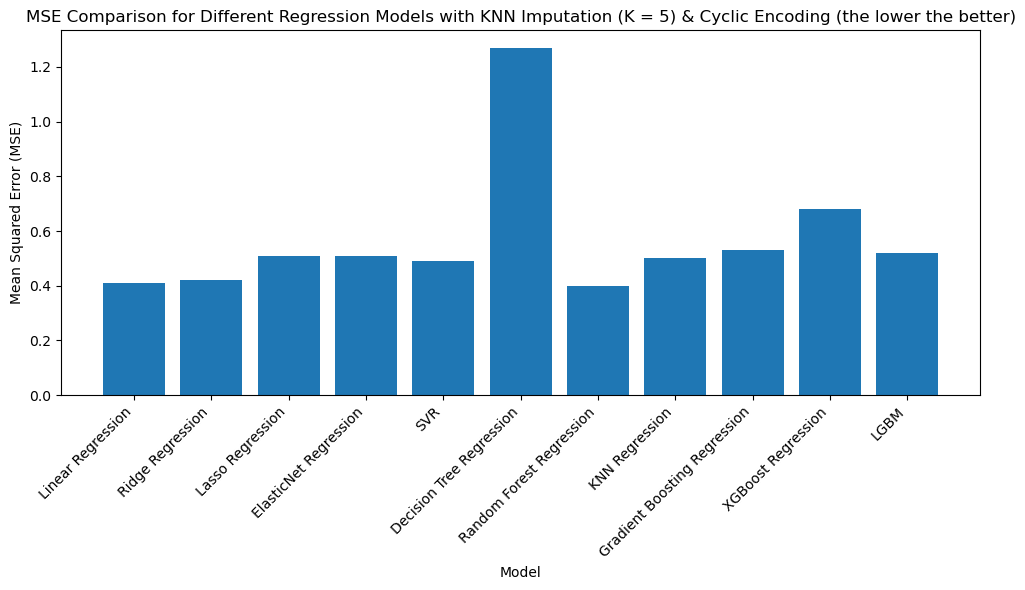

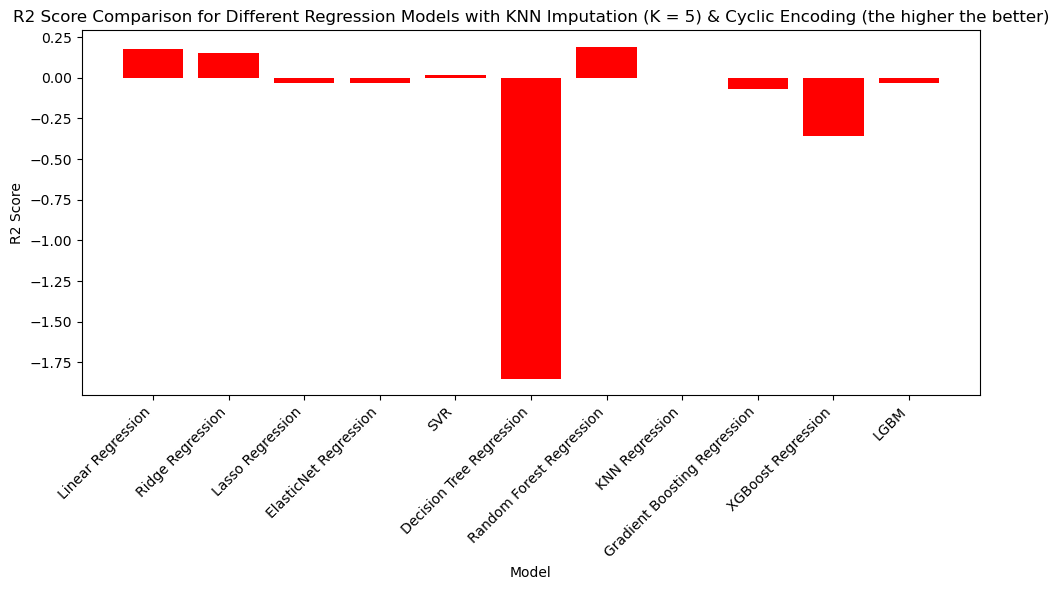

In [ ]:
#Now we plot the different metrics to have a better understanding of the performances

# List of model names and their respective metric values (Replace with your actual data)
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regression', 'Gradient Boosting Regression', 'XGBoost Regression' , 'LGBM']
mse_values = [0.41, 0.42, 0.51, 0.51, 0.49, 1.27, 0.40, 0.50, 0.53, 0.68, 0.52]
r2_values = [0.18, 0.15, -0.03, -0.03, 0.02, -1.85, 0.19, 0, -0.07, -0.36, -0.03]

# Plotting the MSE histogram
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Different Regression Models with KNN Imputation (K = 5) & Cyclic Encoding (the lower the better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the R2 histogram
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values , color = 'r')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Regression Models with KNN Imputation (K = 5) & Cyclic Encoding (the higher the better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


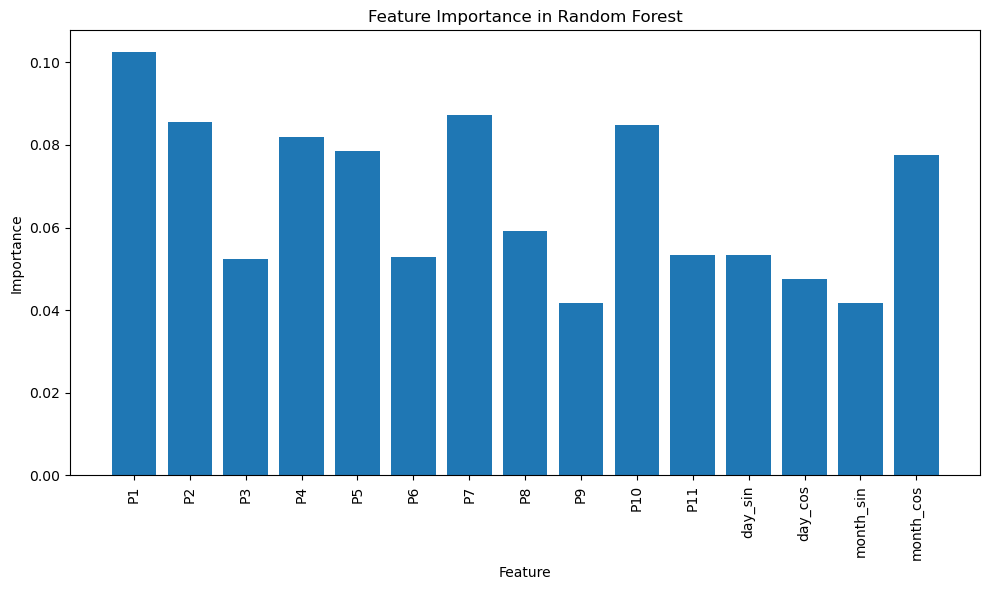

In [399]:
feature_importance = model4.feature_importances_
columns_fi = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'day_sin', 'day_cos', 'month_sin', 'month_cos'] 
           
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=columns_fi)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.tight_layout()
plt.show()


In [ ]:

# We save the trained model using pickle which will be needed for the deployment phase
with open('random_forest_model-0.1.0.pkl', 'wb') as model_file:
    pickle.dump(model4, model_file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


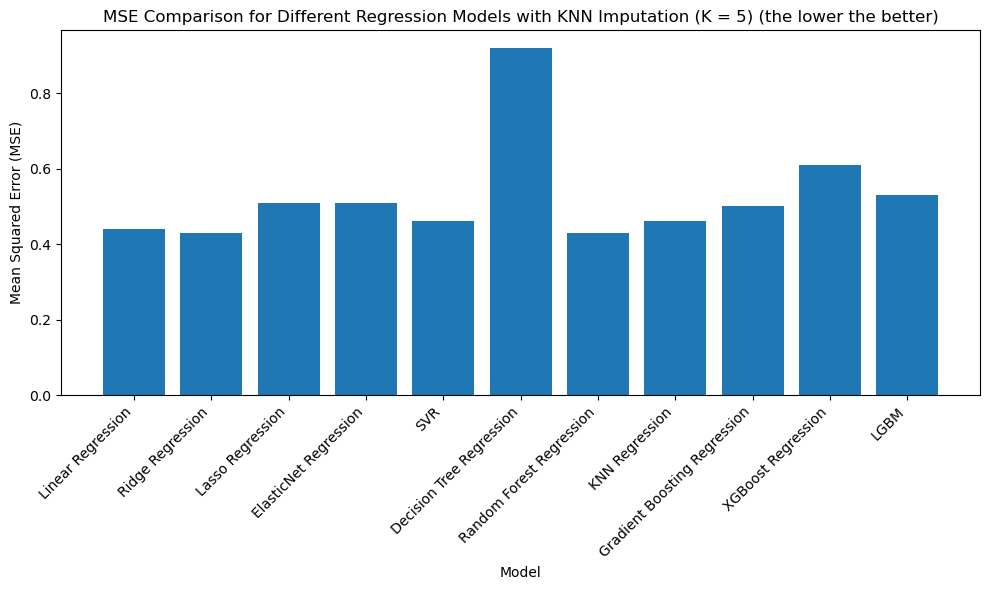

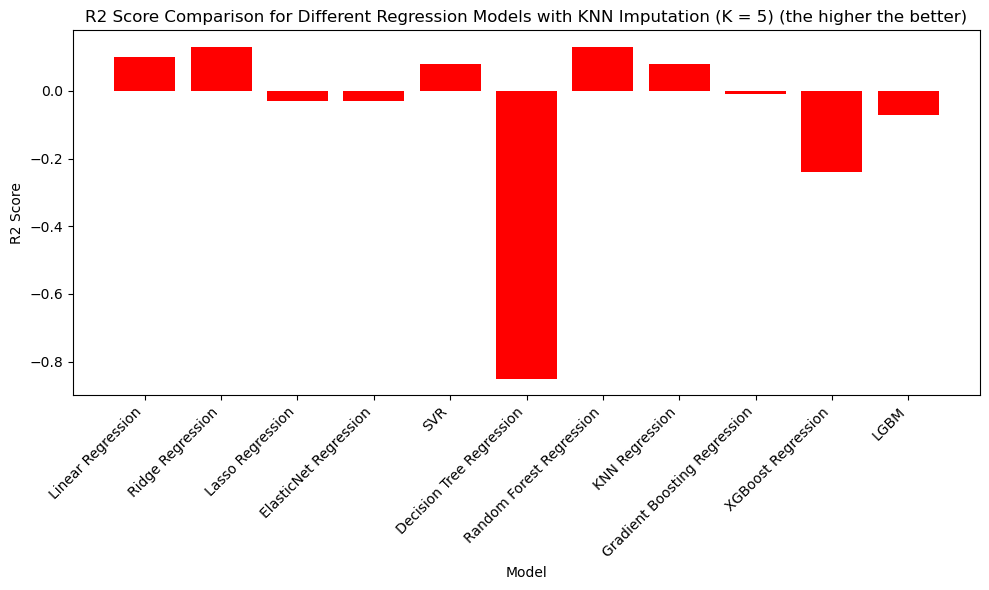

In [ ]:
'''
#Now we plot the different metrics to have a better understanding of the performances

# List of model names and their respective metric values (Replace with your actual data)
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'Decision Tree Regression', 'Random Forest Regression', 'KNN Regression', 'Gradient Boosting Regression', 'XGBoost Regression' , 'LGBM']
mse_values = [0.44, 0.43, 0.51, 0.51, 0.46, 0.92, 0.43, 0.46, 0.50, 0.61, 0.53]
r2_values = [0.10, 0.13, -0.03, -0.03, 0.08, -0.85, 0.13, 0.08, -0.01, -0.24, -0.07]

# Plotting the MSE histogram
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison for Different Regression Models with KNN Imputation (K = 5) (the lower the better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the R2 histogram
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values , color = 'r')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison for Different Regression Models with KNN Imputation (K = 5) (the higher the better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
'''
